Aluno: Flávio Amorim

Matrícula: 211100510

e-mail: flamorim@gmail.com

Github: 

Para a informação sobre EMPRESA, foram feitas 04 wordclouds, sendo elas:

1.   Análise 1 - Wordlcoud stemming: aplicado tokenização e stemming
2.   Análise 1 - Wordlcoud Clean: apenas tokenização
3.   Análise 1 - Wordlcoud Stop Wprds: com stop words
4.   Análise Anternativa: sem nenhum tratamento, mas, no nome das empresas, substituindo o caracter branco entre palavras por '_'. Foi possível reparar que visualmente fica melhor, pois muitos nomes de empresar são palavras compostas, que então ficaria melhor num wordcloud sem ngrams. 

No final do notebook estão as análises de 'Estado' e 'Serviços', esta última que também teve as análises com stemming, clean e com stopword semelhante a análise de Empresa. 


A figura abaixo ilustra as análises de Empresa.





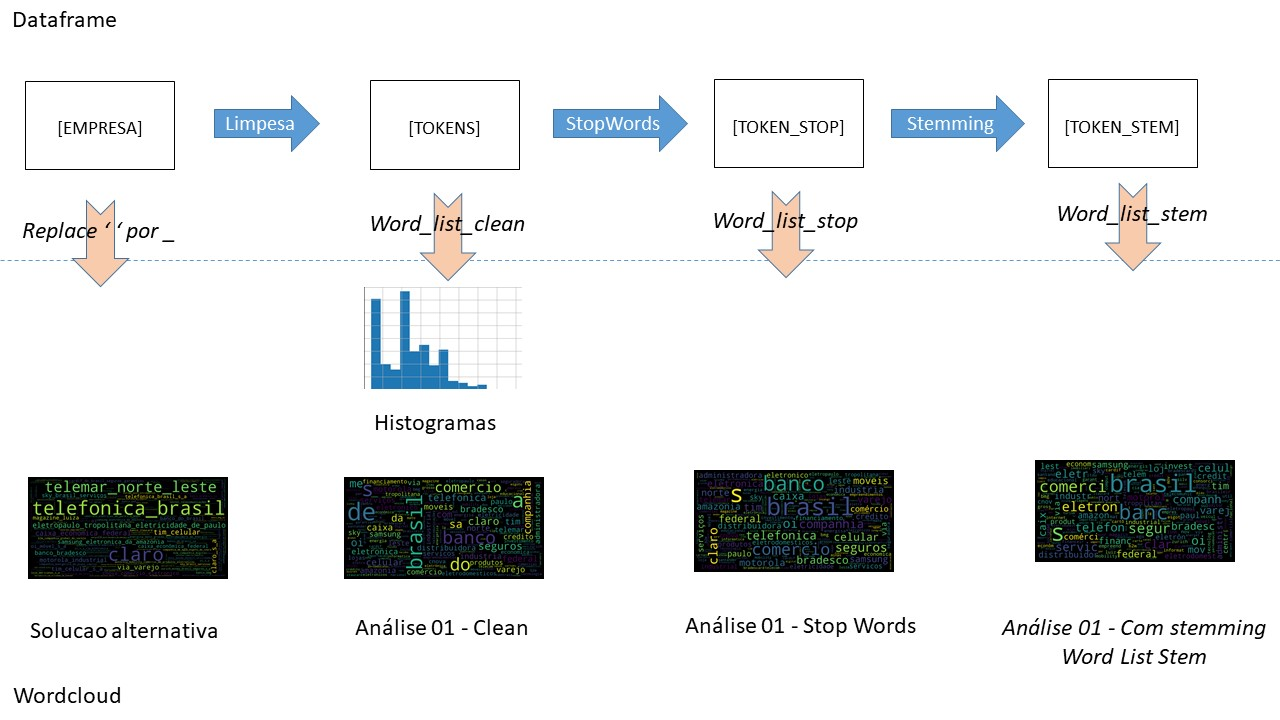

In [128]:
Image('figura01.jpg',width=1000, height=600)

#Carregando o arquivo e entendendo-o

In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('base2.csv',sep=';',header=0)

In [52]:
df.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,"faixa etarea,,,,,,,,,,,,,"
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS,COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento,alteração,transferen...","entre 31 a 40 anos,,,,,,,"
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,"mais de 70 anos,,,,,,,,,,,,,"
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,"entre 31 a 40 anos,,,,,,,,,,,,,"
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular,Supermercado,Shopp...","Vicio de qualidade (mal executado,inadequado,i...","entre 31 a 40 anos,,,,,,,,"
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado,inadequado,i...","entre 41 a 50 anos,,,,,,,,,,,"


In [53]:
df.tail()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,"faixa etarea,,,,,,,,,,,,,"
42302,Sudeste,SP,B2W COMPANHIA DIGITAL,AMERICANAS.COM/SUBMARINO/SHOPTIME/SOUBARATO,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,Microcomputador / Produtos de Informática,Não entrega/demora na entrega do produto,"Nao Informada,,,,,,,,,,,,,"
42303,Sudeste,SP,ADIDAS DO BRASIL LTDA,ADIDAS.COM.BR,COMÉRCIO ATACADISTA DE CALÇADOS,Vestuário ( Calçado / Roupa ),Não entrega/demora na entrega do produto,"entre 31 a 40 anos,,,,,,,,,,,,,"
42304,Sudeste,SP,RN COMERCIO VAREJISTA S/A,RICARDOELETRO.COM.BR/INSINUANTE.COM/ELETROSHOP...,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,"Acessório Para Vestuário ( Bolsa,Cinto,Chapéu,...",Produto entregue diferente do pedido,"entre 21 a 30 anos,,,,,,"
42305,Sudeste,SP,DECOLAR.COM LTDA,AGÊNCIA DECOLAR,AGÊNCIAS DE VIAGENS,Agências e Operadoras de viagens (pacotes turí...,Recusa injustificada em prestar serviço,"Nao Informada,,,,,,,,,,,,,"
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré,1º,2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,"entre 31 a 40 anos,,,,,,,,,,,"


In [54]:
df.describe

<bound method NDFrame.describe of        Regiao   ...        faixa etarea,,,,,,,,,,,,,
0      Sudeste  ...        entre 31 a 40 anos,,,,,,,
1      Sudeste  ...     mais de 70 anos,,,,,,,,,,,,,
2      Sudeste  ...  entre 31 a 40 anos,,,,,,,,,,,,,
3      Sudeste  ...       entre 31 a 40 anos,,,,,,,,
4      Sudeste  ...    entre 41 a 50 anos,,,,,,,,,,,
...        ...  ...                              ...
42302  Sudeste  ...       Nao Informada,,,,,,,,,,,,,
42303  Sudeste  ...  entre 31 a 40 anos,,,,,,,,,,,,,
42304  Sudeste  ...         entre 21 a 30 anos,,,,,,
42305  Sudeste  ...       Nao Informada,,,,,,,,,,,,,
42306  Sudeste  ...    entre 31 a 40 anos,,,,,,,,,,,

[42307 rows x 8 columns]>

In [55]:
len(df.columns)

8

In [56]:
#tratar esta coluna futuramente
df.iloc[:,7]

0              entre 31 a 40 anos,,,,,,,
1           mais de 70 anos,,,,,,,,,,,,,
2        entre 31 a 40 anos,,,,,,,,,,,,,
3             entre 31 a 40 anos,,,,,,,,
4          entre 41 a 50 anos,,,,,,,,,,,
                      ...               
42302         Nao Informada,,,,,,,,,,,,,
42303    entre 31 a 40 anos,,,,,,,,,,,,,
42304           entre 21 a 30 anos,,,,,,
42305         Nao Informada,,,,,,,,,,,,,
42306      entre 31 a 40 anos,,,,,,,,,,,
Name: faixa etarea,,,,,,,,,,,,,, Length: 42307, dtype: object

#Acertar os nomes das colunas para ficarem sem espacos em branco e em minuscula

In [57]:
# o nome das colunas tem espacos em branco, vou limpa-los para facilitar o trabalho
nomes = pd.Series(df.columns)
for x in range(len(nomes)):
  nomes[x] = nomes[x].strip().lower()
nomes[7]= 'faixaetarea'
df.columns = nomes
df.columns

Index(['regiao', 'estado', 'empresa', 'subsidiaria', 'area', 'serviço',
       'problema', 'faixaetarea'],
      dtype='object')

#Remover as virgulas da coluna 'faixa etaria'

In [58]:
df['faixaetarea'] = df['faixaetarea'].str.replace(',','')
df['faixaetarea'].values

array(['entre 31 a 40 anos', 'mais de 70 anos', 'entre 31 a 40 anos', ...,
       'entre 21 a 30 anos', 'Nao Informada', 'entre 31 a 40 anos'],
      dtype=object)

#Existem NaN no arquivo, mas não nas colunas Empresa e Estado, que são alvo desse estudo e estão 100% preeenchidas e com valores coerentes




In [59]:
for col in df.columns:
    perc = np.mean(df[col].isna())
##    perc = np.mean(df[col] == 0)
    print(f'{col}: {round(perc*100)} %')

regiao: 0 %
estado: 0 %
empresa: 0 %
subsidiaria: 15 %
area: 13 %
serviço: 0 %
problema: 21 %
faixaetarea: 0 %


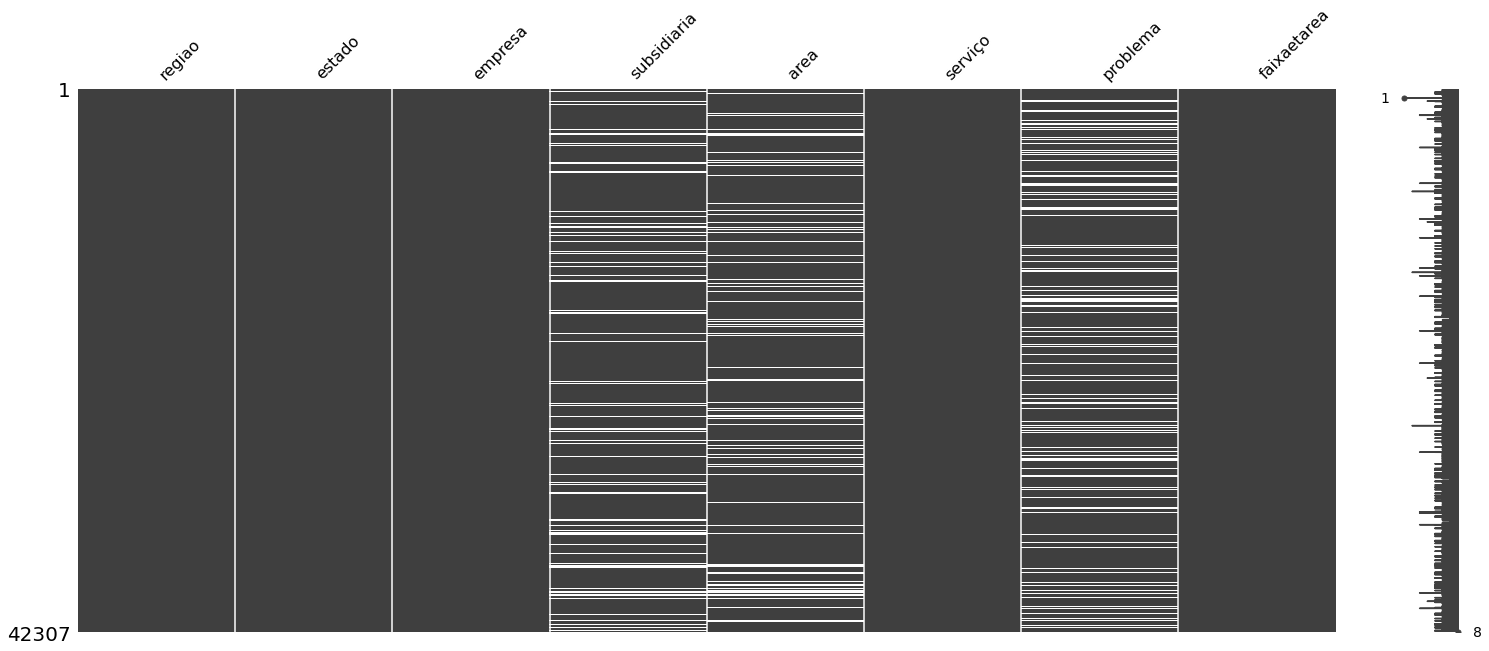

In [60]:
import missingno
missingno.matrix(df)

In [61]:
# a coluna problema apresenta NaN, mas não será feito uma análise qualitativa, então isso não será tratado.
df.loc[(df['problema'].isna())]

,regiao,estado,empresa,subsidiaria,area,serviço,problema,faixaetarea
33,Norte,PA,CENTRAIS ELÉTRICAS DO PARÁ S/A,CELPA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,NaN,entre 41 a 50 anos
34,Norte,PA,RESIDENCIAL PARIS INCORPORAÇÕES LTDA,RESIDENCIAL PARIS,COMPRA E VENDA DE IMÓVEIS PRÓPRIOS,Loteamento,NaN,entre 21 a 30 anos
35,Norte,PA,CENTRAIS ELÉTRICAS DO PARÁ S/A,CELPA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,NaN,entre 61 a 70 anos
36,Norte,PA,SUL E SUDESTE COM. DE MÓVEIS ELET MAGAZINE LTD...,CHIQUINHO ELETRO,COMÉRCIO VAREJISTA DE MÓVEIS,Financeira,NaN,entre 51 a 60 anos
37,Norte,PA,CENTRAIS ELÉTRICAS DO PARÁ S/A,CELPA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,NaN,entre 61 a 70 anos
...,...,...,...,...,...,...,...,...
42280,Nordeste,RN,DURVAL JOSÉ DANTAS,MARÉ MANSA,COMÉRCIO VAREJISTA DE MÓVEIS,Móveis Para Cozinha,NaN,entre 41 a 50 anos
42281,Nordeste,RN,CARDIF DO BRASIL SEGUROS E GARANTIAS S/A,CARDIF,SEGUROS NÃO-VIDA,Máquina de Lavar Roupa / Louça e Secadora,NaN,entre 31 a 40 anos
42282,Nordeste,RN,CARREFOUR COMERCIO E INDUSTRIA LTDA,CARREFOUR,"COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL,COM...",Máquina de Lavar Roupa / Louça e Secadora,NaN,entre 31 a 40 anos
42283,Nordeste,RN,BANCO ITAU BBA S.A.,FINANCIAMENTO E LEASING DE VEÍCILOS,"BANCOS MÚLTIPLOS,COM CARTEIRA COMERCIAL",Cartão de Crédito,NaN,entre 51 a 60 anos


# Corrigir a coluna Estado, pois tem 34 valores diferentes e nao temos 34 estados no Brasil

In [62]:
## ALGUM ERRO NA BASE, POIS O BRASIL NAO TEM 34 ESTADOS
for col in df.columns:
    quant = len(df[col].unique())
    print(f'{col}: {quant}')

regiao: 20
estado: 34
empresa: 11216
subsidiaria: 8866
area: 558
serviço: 194
problema: 168
faixaetarea: 9


In [63]:
df['estado'].unique()

array(['SP', 'PA', 'RO', 'MA', 'SC', 'RN', 'MG', 'ES', 'MS', 'MT', nan,
       'GO', 'Telefone ( Convencional,Celular,Interfone,Etc. )',
       'Telefonia Celular', 'Outros Contratos', 'RS', 'TO', 'PI',
       'Duvida sobre cobrança/valor/reajuste/contrato/orçamento.', 'PB',
       'HOLDINGS DE INSTITUIÇÕES NÃO-FINANCEIRAS', 'PE',
       'Recusa injustificada em prestar serviço', 'Cartão de Loja',
       'Publicidade enganosa', 'entre 31 a 40 anos,,,,,,,,,,,',
       'Desistência de compra (cancelamento de compra)',
       'Não entrega/demora na entrega do produto', 'CE',
       'Banco comercial', 'entre 21 a 30 anos,,,,,,,,,,,',
       'Produto entregue diferente do pedido',
       'Aparelho de Som ( Gravador,3x1,CD )',
       'Televisão / Vídeo Cassete / Filmadora / Video-Laser'],
      dtype=object)

In [64]:
## todos os registros com 'estado' com mais de 2 caracteres seráo removidos. Primeiro eu os marco como 'ERRO' e depois apagado
for x in range(len(df)):
  if (len(str(df.iloc[x,1])) > 2):
    df.iloc[x,1] = 'ERRO'
df = df[df['estado'] != 'ERRO']



#Verificando as demais colunas

In [65]:
#Regiao ok
df['regiao'].unique()

array(['Sudeste', 'Norte', 'Nordeste', 'Sul', 'Centro-oeste'],
      dtype=object)

In [66]:
#empresa OK
df['empresa'].unique()

array(['ITAÚ UNIBANCO S/A', 'CLARO S/A',
       'ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO', ...,
       'SERRALHERIA E METALÚRGIZA AMAZON',
       'SOCIEDADE PAULISTA DE ENSINO E PESQUISA S/S LTDA',
       'ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA'], dtype=object)

In [67]:
#depois incluir em stop word as palavras S/A, LTDA e semelhantes
df['empresa']

0                                        ITAÚ UNIBANCO S/A
1                                                CLARO S/A
2        ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO
3                                  GNN GARAGENS LTDA - EPP
4                                                CLARO S/A
                               ...                        
42302                                B2W COMPANHIA DIGITAL
42303                                ADIDAS DO BRASIL LTDA
42304                            RN COMERCIO VAREJISTA S/A
42305                                     DECOLAR.COM LTDA
42306           ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA
Name: empresa, Length: 42280, dtype: object

In [68]:
df['serviço'].unique()

array(['Outros Contratos',
       'Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação )',
       'Energia Elétrica',
       'Estacionamento ( Particular,Supermercado,Shopping,Etc. )',
       'Agências e Operadoras de viagens (pacotes turísticos)',
       'Artigos de Enxoval ( Cama / Mesa e Banho )',
       'Academia de Ginástica / Natação / Esportes',
       'Oficinas ( Mecânica,Funilaria,Auto-Elétrica,Borracharia )',
       'Telefone ( Convencional,Celular,Interfone,Etc. )',
       'Cartão de Crédito', 'Financeira', 'Móveis Para Quarto',
       'Seguro de Vida', 'Seguro', 'Outros Seguros', 'Banco comercial',
       'Móveis Para Cozinha',
       'Automóvel - Locação / Assistência Automobilística ( Clube do Automóvel,Etc. ) / Auto Escola',
       'Plano de saúde regulamentado', 'Telefonia Celular',
       'Consultoria / Assessoria / Agenciamento ( Recolocação Profissional,Agência de Empregada,de Casamento,Etc. )',
       'Móveis Para Sala', 'Curso de Línguas', 'Loteamento', '

In [69]:
# remover em 'serviço' o texto que está depois do '(', 
# permancendo então somente o que está fora do parentesis
# para tornar a interpretação do wordcloud mais fácil
for x in range(len(df)):
  df.iloc[x,5] = str(df.iloc[x,5]).split("(", 1)[0]

df.serviço = df.serviço.str.strip()  # retirar espacos em branco no incio e no final


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [70]:
df.serviço

0                                 Outros Contratos
1                                   Telefonia Fixa
2                                 Energia Elétrica
3                                   Estacionamento
4                                   Telefonia Fixa
                           ...                    
42302    Microcomputador / Produtos de Informática
42303                                    Vestuário
42304                     Acessório Para Vestuário
42305             Agências e Operadoras de viagens
42306                                       Escola
Name: serviço, Length: 42280, dtype: object

# Histogramas

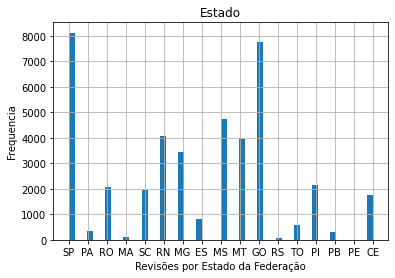

In [71]:
#fazer histograma de Estado
ax = df.estado.hist(bins=50)
ax.set(xlabel='Revisões por Estado da Federação', ylabel='Frequencia', title='Estado');

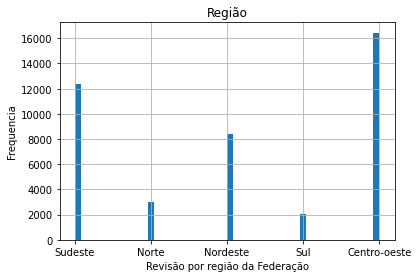

In [72]:
#fazer histograma de regiao
ax = df.regiao.hist(bins=50)
ax.set(xlabel='Revisão por região da Federação', ylabel='Frequencia', title='Região');

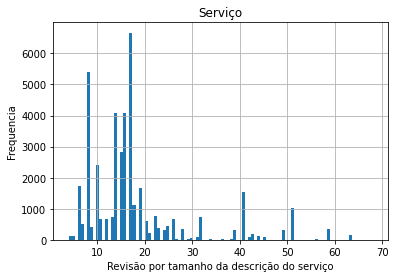

In [73]:
#fazer histograma de servico
ax = df.serviço.map(len).hist(bins=100)
ax.set(xlabel='Revisão por tamanho da descrição do serviço', ylabel='Frequencia', title='Serviço');

In [74]:
#IMPORTANTE
#encontrado problema na coluna ['empresa'], onde algum campo foi lido do csv como float.
#para evitar problemas semelhantes com outras colunas, todas serão convertidas para str

for col in df.columns:
    df[col] = df[col].astype(str)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,regiao,estado,empresa,subsidiaria,area,serviço,problema,faixaetarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS,COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento,alteração,transferen...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,nan,Telefonia Fixa,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,Estacionamento,"Vicio de qualidade (mal executado,inadequado,i...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa,"Vicio de qualidade (mal executado,inadequado,i...",entre 41 a 50 anos


# Importar as bibliotecas

In [75]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Wordcloud para empresa - Análise 01

In [76]:
#df['empresa'] é a coluna #2
df.iloc[1:100,2]

1                                             CLARO S/A
2     ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO
3                               GNN GARAGENS LTDA - EPP
4                                             CLARO S/A
5                 AEROVIAS DEL CONTINENTE AMERICANO S/A
                            ...                        
95                                        DANIEL MATTEI
96    INTERGLOBAL SAÚDE CONVÊNIO MÉDICO HOSPITALAR LTDA
97                                            CLARO S/A
98                                      TIM CELULAR S/A
99                                TELEFONICA BRASIL S/A
Name: empresa, Length: 99, dtype: object

In [77]:
#colocar todas as palavras de ['empresas'] em minúsculas     11111
letra_minuscula = lambda x: x.replace(x, x.lower())
df['empresa'] = df.empresa.map(letra_minuscula)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
df.head()

,regiao,estado,empresa,subsidiaria,area,serviço,problema,faixaetarea
0,Sudeste,SP,itaú unibanco s/a,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS,COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento,alteração,transferen...",entre 31 a 40 anos
1,Sudeste,SP,claro s/a,NET,nan,Telefonia Fixa,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,eletropaulo metropolitana eletricidade de s paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,gnn garagens ltda - epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,Estacionamento,"Vicio de qualidade (mal executado,inadequado,i...",entre 31 a 40 anos
4,Sudeste,SP,claro s/a,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa,"Vicio de qualidade (mal executado,inadequado,i...",entre 41 a 50 anos


In [80]:
#Remover pontuação
string.punctuation
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df.empresa = df.empresa.map(punc_re)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Tokenizacao

In [81]:
#Tokenizar ['empresa'] em palavras

df['tokens'] = df.empresa.map(word_tokenize)
df[['empresa','tokens']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,empresa,tokens
0,itaú unibanco s a,"[itaú, unibanco, s, a]"
1,claro s a,"[claro, s, a]"
2,eletropaulo metropolitana eletricidade de s paulo,"[eletropaulo, metropolitana, eletricidade, de,..."
3,gnn garagens ltda epp,"[gnn, garagens, ltda, epp]"
4,claro s a,"[claro, s, a]"
...,...,...
42302,b2w companhia digital,"[b2w, companhia, digital]"
42303,adidas do brasil ltda,"[adidas, do, brasil, ltda]"
42304,rn comercio varejista s a,"[rn, comercio, varejista, s, a]"
42305,decolar com ltda,"[decolar, com, ltda]"


In [82]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df.tokens.tolist(), [])
print(len(word_list))
#word_list


201847


In [83]:
# Estas são as etapas para encontrar as palavras mais comuns

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificar
# pela quantidade de repeticoes 
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
print(len(word_counts))
word_counts[:10]

9222


[(17969, 's'),
 (17480, 'a'),
 (13188, 'ltda'),
 (8598, 'de'),
 (6312, 'brasil'),
 (6223, 'e'),
 (4288, 'banco'),
 (4189, 'do'),
 (2482, 'comercio'),
 (2271, 'me')]

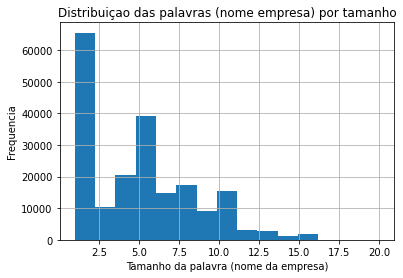

In [84]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Tamanho da palavra (nome da empresa)', ylabel='Frequencia', title='Distribuiçao das palavras (nome empresa) por tamanho');

## Stop Words

In [183]:
# Remova as stop words

from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
#=======================================================================================
#acrescentei outras palavras na stopword
stopw_empresas = ['me','sa','epp','spe','ltda','eireli','s','a']

for tipo in stopw_empresas:
  stop_words.append(tipo)

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df['tokens_stop'] = df.tokens.apply(stop_lambda)
df[['empresa','tokens','tokens_stop']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,empresa,tokens,tokens_stop
0,itaú_unibanco,"[itaú, unibanco, s, a]","[itaú, unibanco]"
1,claro,"[claro, s, a]",[claro]
2,eletropaulo_metropolitana_eletricidade_de_s_paulo,"[eletropaulo, metropolitana, eletricidade, de,...","[eletropaulo, metropolitana, eletricidade, paulo]"
3,gnn_garagens,"[gnn, garagens, ltda, epp]","[gnn, garagens]"
4,claro,"[claro, s, a]",[claro]
...,...,...,...
42302,b2w_companhia_digital,"[b2w, companhia, digital]","[b2w, companhia, digital]"
42303,adidas_do_brasil,"[adidas, do, brasil, ltda]","[adidas, brasil]"
42304,rn_comercio_varejista,"[rn, comercio, varejista, s, a]","[rn, comercio, varejista]"
42305,decolar_com,"[decolar, com, ltda]",[decolar]


## marcação de fala (palavra) nao foi feita

In [86]:
# Marcacao de palavra (pos_tag) nao sera feita
# pois a liguagem utilizada na base de dados é português
# mostra a posição gramatical - verbo, nome, 

## Wordcloud para empresa - Análise 01 - Com stemming

In [87]:
##
# Executar stemming, que remove terminações de palavras alternativas sem o conhecimento do contexto
# Pode-se reparar que as vogais finais das palavras foram retiradas
# Terminação 'ar' de verbos também foram retirados
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('portuguese')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

df['tokens_stem'] = df.tokens_stop.apply(stem_lambda)
df[['empresa','tokens','tokens_stop','tokens_stem']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,empresa,tokens,tokens_stop,tokens_stem
0,itaú unibanco s a,"[itaú, unibanco, s, a]","[itaú, unibanco]","[itaú, unibanc]"
1,claro s a,"[claro, s, a]",[claro],[clar]
2,eletropaulo metropolitana eletricidade de s paulo,"[eletropaulo, metropolitana, eletricidade, de,...","[eletropaulo, metropolitana, eletricidade, paulo]","[eletropaul, metropolitan, eletr, paul]"
3,gnn garagens ltda epp,"[gnn, garagens, ltda, epp]","[gnn, garagens]","[gnn, garagens]"
4,claro s a,"[claro, s, a]",[claro],[clar]
...,...,...,...,...
42302,b2w companhia digital,"[b2w, companhia, digital]","[b2w, companhia, digital]","[b2w, companh, digital]"
42303,adidas do brasil ltda,"[adidas, do, brasil, ltda]","[adidas, brasil]","[adid, brasil]"
42304,rn comercio varejista s a,"[rn, comercio, varejista, s, a]","[rn, comercio, varejista]","[rn, comerci, varej]"
42305,decolar com ltda,"[decolar, com, ltda]",[decolar],[decol]


## Wordcloud para empresa - Análise 01 - Com stemming

In [88]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados
# coluna ['tokens_stem']

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_stem = sum(df.tokens_stem.tolist(), [])

word_list_stem

['itaú',
 'unibanc',
 'clar',
 'eletropaul',
 'metropolitan',
 'eletr',
 'paul',
 'gnn',
 'garagens',
 'clar',
 'aerov',
 'del',
 'continent',
 'american',
 'b2w',
 'companh',
 'digital',
 'telefon',
 'brasil',
 'winn',
 'fit',
 'academ',
 'superfor',
 'sp',
 'veícul',
 'motorol',
 'mobility',
 'comerci',
 'produt',
 'eletr',
 'portoseg',
 'credit',
 'financ',
 'invest',
 'banc',
 'pan',
 'comercial',
 'zen',
 'móv',
 'sociedad',
 'bradesc',
 'vid',
 'previdenc',
 'banc',
 'cetel',
 'sasc',
 'tecnolog',
 'segur',
 'automot',
 'eletropaul',
 'metropolitan',
 'eletr',
 'paul',
 'bradesc',
 'aut',
 're',
 'companh',
 'segur',
 'banc',
 'pan',
 'banc',
 'bmg',
 'eletropaul',
 'metropolitan',
 'eletr',
 'paul',
 'castel',
 'verd',
 'comerci',
 'mov',
 'centr',
 'formaca',
 'condutor',
 'b',
 'robl',
 'penh',
 'medisanit',
 'brasil',
 'assistenc',
 'integral',
 'saúd',
 'sicoob',
 'coopercred',
 'sp',
 'tim',
 'celul',
 'lim',
 'negociaco',
 'financeir',
 'acbz',
 'import',
 'comérci',
 'mob

In [89]:
# Converte a lista em um dicionário com contagem de valores
word_counts_stem = Counter(word_list_stem)
list_stop_stemming = word_counts_stem

# Inverta a chave / valores no dicionário para classificar
word_counts_stem = list(zip(word_counts_stem.values(), word_counts_stem.keys()))

# Classifique a lista por contagem
word_counts_stem = sorted(word_counts_stem, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stem[:10]

[(6330, 'brasil'),
 (4301, 'banc'),
 (2483, 'comerci'),
 (1896, 'segur'),
 (1678, 'eletron'),
 (1404, 'oi'),
 (1320, 'clar'),
 (1307, 'telefon'),
 (1291, 'servic'),
 (1255, 'companh')]

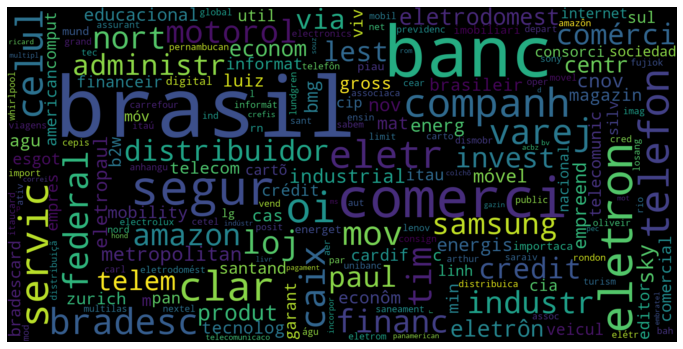

In [90]:
#word cloud com a list_stop_lemming

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(list_stop_stemming)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud para empresa - Análise 01 - Clean (sem stopwords e sem stemming)

In [91]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados
# coluna ['tokens']

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df.tokens.tolist(), [])

word_list_clean[:10]

['itaú',
 'unibanco',
 's',
 'a',
 'claro',
 's',
 'a',
 'eletropaulo',
 'metropolitana',
 'eletricidade']

In [92]:
# Converte a lista em um dicionário com contagem de valores  - 33
word_counts_clean = Counter(word_list_clean)
list_clean = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime a lista
word_counts_clean

[(17969, 's'),
 (17480, 'a'),
 (13188, 'ltda'),
 (8598, 'de'),
 (6312, 'brasil'),
 (6223, 'e'),
 (4288, 'banco'),
 (4189, 'do'),
 (2482, 'comercio'),
 (2271, 'me'),
 (1895, 'sa'),
 (1404, 'oi'),
 (1362, 'seguros'),
 (1319, 'claro'),
 (1260, 'da'),
 (1255, 'companhia'),
 (1195, 'telefonica'),
 (980, 'bradesco'),
 (971, 'celular'),
 (932, 'caixa'),
 (928, 'com'),
 (869, 'federal'),
 (861, 'tim'),
 (800, 'moveis'),
 (761, 'motorola'),
 (760, 'varejo'),
 (744, 'norte'),
 (744, 'eletronica'),
 (742, 'lojas'),
 (722, 'industria'),
 (695, 'samsung'),
 (693, 'amazonia'),
 (659, 'distribuidora'),
 (637, 'comércio'),
 (625, 'paulo'),
 (619, 'administradora'),
 (605, 'credito'),
 (598, 'via'),
 (589, 'serviços'),
 (576, 'leste'),
 (569, 'telemar'),
 (568, 'epp'),
 (546, 'eireli'),
 (540, 'sky'),
 (539, 'produtos'),
 (521, 'eletronico'),
 (515, 'servicos'),
 (513, 'eletrodomesticos'),
 (498, 'cnova'),
 (496, 'eletricidade'),
 (492, 'industrial'),
 (491, 'financiamento'),
 (481, 'metropolitana'),
 

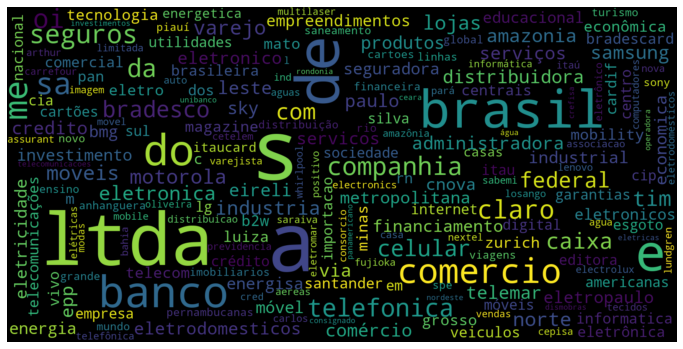

In [93]:
#word cloud com a list_clean

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(list_clean)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud para empresa - Análise 01 - Stop Words



In [94]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados
# coluna ['tokens_stop']

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_stop = sum(df.tokens_stop.tolist(), [])

word_list_stop[:10]

['itaú',
 'unibanco',
 'claro',
 'eletropaulo',
 'metropolitana',
 'eletricidade',
 'paulo',
 'gnn',
 'garagens',
 'claro']

In [95]:
# Converte a lista em um dicionário com contagem de valores BB
word_counts_stop = Counter(word_list_stop)
list_stop = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(6312, 'brasil'),
 (4288, 'banco'),
 (2482, 'comercio'),
 (1404, 'oi'),
 (1362, 'seguros'),
 (1319, 'claro'),
 (1255, 'companhia'),
 (1195, 'telefonica'),
 (980, 'bradesco'),
 (971, 'celular')]

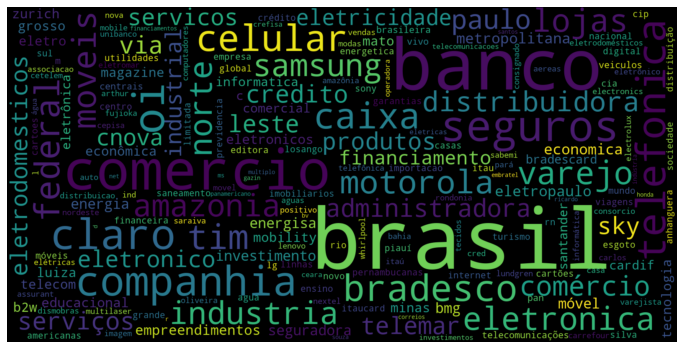

In [96]:
#word cloud com a list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(list_stop)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud para empresa - Análise alternativa

##Será colocado um  '_'  entre as palavras de um nome das empresas

In [144]:
## retirar espaco ao final do campo
remove_tipo = lambda x: re.sub(r""" +$""", '', x.lower())
df.empresa = df.empresa.map(remove_tipo)

remove_tipo = lambda x: re.sub(r"""_s_a+$|_ltda+$|_epp+$|_+$|_me+$|_spe+$|_eirel+$""", '', x.lower())
df.empresa = df.empresa.map(remove_tipo)

df['empresa'] = df['empresa'].str.replace(' ','_')
#
df.empresa

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                                            itaú_unibanco
1                                                    claro
2        eletropaulo_metropolitana_eletricidade_de_s_paulo
3                                             gnn_garagens
4                                                    claro
                               ...                        
42302                                b2w_companhia_digital
42303                                     adidas_do_brasil
42304                                rn_comercio_varejista
42305                                          decolar_com
42306                esab_escola_superior_aberta_do_brasil
Name: empresa, Length: 42280, dtype: object

In [145]:
df.head()

,regiao,estado,empresa,subsidiaria,area,serviço,problema,faixaetarea,tokens,tokens_stop,tokens_stem,tokens_,tokens_estado,tokens_serviço,tokens_serviço_stop
0,Sudeste,SP,itaú_unibanco,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS,COM CARTEIRA COMERCIAL",outros contratos,"Contrato (não cumprimento,alteração,transferen...",entre 31 a 40 anos,"[itaú, unibanco, s, a]","[itaú, unibanco]","[itaú, unibanc]",[itaú_unibanco],[SP],"[outros, contratos]","[outros, contratos]"
1,Sudeste,SP,claro,NET,nan,telefonia fixa,Contrato - Rescisão/alteração unilateral,mais de 70 anos,"[claro, s, a]",[claro],[clar],[claro],[SP],"[telefonia, fixa]","[telefonia, fixa]"
2,Sudeste,SP,eletropaulo_metropolitana_eletricidade_de_s_paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos,"[eletropaulo, metropolitana, eletricidade, de,...","[eletropaulo, metropolitana, eletricidade, paulo]","[eletropaul, metropolitan, eletr, paul]",[eletropaulo_metropolitana_eletricidade_de_s_p...,[SP],"[energia, elétrica]","[energia, elétrica]"
3,Sudeste,SP,gnn_garagens,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento,"Vicio de qualidade (mal executado,inadequado,i...",entre 31 a 40 anos,"[gnn, garagens, ltda, epp]","[gnn, garagens]","[gnn, garagens]",[gnn_garagens],[SP],[estacionamento],[estacionamento]
4,Sudeste,SP,claro,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa,"Vicio de qualidade (mal executado,inadequado,i...",entre 41 a 50 anos,"[claro, s, a]",[claro],[clar],[claro],[SP],"[telefonia, fixa]","[telefonia, fixa]"


In [146]:
#Tokenizar ['empresa'] em palavras  - 11

df['tokens_'] = df.empresa.map(word_tokenize)
df[['empresa','tokens','tokens_']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,empresa,tokens,tokens_
0,itaú_unibanco,"[itaú, unibanco, s, a]",[itaú_unibanco]
1,claro,"[claro, s, a]",[claro]
2,eletropaulo_metropolitana_eletricidade_de_s_paulo,"[eletropaulo, metropolitana, eletricidade, de,...",[eletropaulo_metropolitana_eletricidade_de_s_p...
3,gnn_garagens,"[gnn, garagens, ltda, epp]",[gnn_garagens]
4,claro,"[claro, s, a]",[claro]
...,...,...,...
42302,b2w_companhia_digital,"[b2w, companhia, digital]",[b2w_companhia_digital]
42303,adidas_do_brasil,"[adidas, do, brasil, ltda]",[adidas_do_brasil]
42304,rn_comercio_varejista,"[rn, comercio, varejista, s, a]",[rn_comercio_varejista]
42305,decolar_com,"[decolar, com, ltda]",[decolar_com]


In [147]:

word_list_alternative = sum(df.tokens_.tolist(), [])
print(len(word_list_alternative))


42280


In [148]:
# Converte a lista em um dicionário com contagem de valores  - 33
word_counts_alternative = Counter(word_list_alternative)
list_alternative = word_counts_alternative

# Inverta a chave / valores no dicionário para classificar
word_counts_alternative = list(zip(word_counts_alternative.values(), word_counts_alternative.keys()))

# Classifique a lista por contagem
word_counts_alternative = sorted(word_counts_alternative, reverse=True)

# Imprime as palavras mais comuns
word_counts_alternative

[(1201, 'claro'),
 (1089, 'telefonica_brasil'),
 (800, 'tim_celular'),
 (532, 'via_varejo'),
 (480, 'eletropaulo_metropolitana_eletricidade_de_s_paulo'),
 (451, 'caixa_economica_federal'),
 (398, 'telemar_norte_leste'),
 (375, 'oi_móvel'),
 (356, 'samsung_eletronica_da_amazonia'),
 (356, 'oi'),
 (356, 'cnova_comercio_eletronico'),
 (348, 'motorola_industrial'),
 (320, 'magazine_luiza'),
 (315, 'banco_bradesco'),
 (309, 'banco_do_brasil'),
 (308, 'zurich_minas_brasil_seguros'),
 (293, 'sky_brasil_serviços'),
 (254, 'caixa_econômica_federal'),
 (242, 'banco_pan'),
 (240, 'banco_bradesco_sa'),
 (238, 'banco_bmg'),
 (230, 'cardif_do_brasil_seguros_e_garantias'),
 (220, 'banco_itaucard'),
 (207, 'banco_bradescard'),
 (205, 'energisa_mato_grosso_distribuidora_de_energia'),
 (200, 'lojas_americanas'),
 (193, 'banco_do_brasil_sa'),
 (187, 'samsung_eletrônica_da_amazonia'),
 (182, 'assurant_seguradora'),
 (181, 'anhanguera_educacional'),
 (179, 'companhia_energetica_do_piauí___cepisa'),
 (177, 

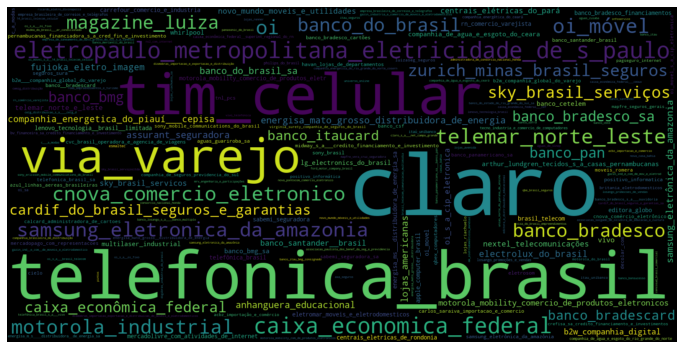

In [149]:
#word cloud com a list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(list_alternative)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud para Estado

In [150]:
#colocar todas as palavras de ['estado'] em maiusculo     001
letra_maiuscula = lambda x: x.replace(x, x.upper())
df['estado'] = df.estado.map(letra_maiuscula)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
#Tokenizar ['estado'] em palavra

df['tokens_estado'] = df.estado.map(word_tokenize)
df[['estado','tokens_estado']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,estado,tokens_estado
0,SP,[SP]
1,SP,[SP]
2,SP,[SP]
3,SP,[SP]
4,SP,[SP]
...,...,...
42302,SP,[SP]
42303,SP,[SP]
42304,SP,[SP]
42305,SP,[SP]


In [152]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df.tokens_estado.tolist(), [])
print(len(word_list))
word_list

42280


['SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'PA',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',

In [153]:
# Estas são as etapas para encontrar as palavras mais comuns

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificar
# pela quantidade de repeticoes 
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
print(len(word_counts))
word_counts

17


[(8120, 'SP'),
 (7761, 'GO'),
 (4723, 'MS'),
 (4072, 'RN'),
 (3960, 'MT'),
 (3456, 'MG'),
 (2153, 'PI'),
 (2057, 'RO'),
 (1955, 'SC'),
 (1766, 'CE'),
 (828, 'ES'),
 (567, 'TO'),
 (341, 'PA'),
 (302, 'PB'),
 (126, 'MA'),
 (90, 'RS'),
 (3, 'PE')]

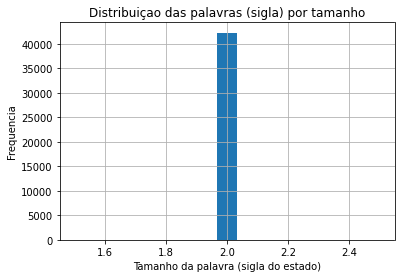

In [154]:
# A distribuição dos comprimentos das palavras          005
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Tamanho da palavra (sigla do estado)', ylabel='Frequencia', title='Distribuiçao das palavras (sigla) por tamanho');

## Nao tem Stop Words

## Não tem marcação de fala (palavra) nao foi feita

##Não tem stemming

In [108]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_estado = sum(df.tokens_estado.tolist(), [])

word_list_estado

['SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'SP',
 'PA',
 'PA',
 'PA',
 'PA',
 'PA',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'PA',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',
 'RO',

In [155]:
# Converte a lista em um dicionário com contagem de valores
word_counts_estado = Counter(word_list_estado)
list_estados = word_counts_estado

# Inverta a chave / valores no dicionário para classificar
word_counts_estado = list(zip(word_counts_estado.values(), word_counts_estado.keys()))

# Classifique a lista por contagem
word_counts_estado = sorted(word_counts_estado, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_estado[:10]

[(8120, 'SP'),
 (7761, 'GO'),
 (4723, 'MS'),
 (4072, 'RN'),
 (3960, 'MT'),
 (3456, 'MG'),
 (2153, 'PI'),
 (2057, 'RO'),
 (1955, 'SC'),
 (1766, 'CE')]

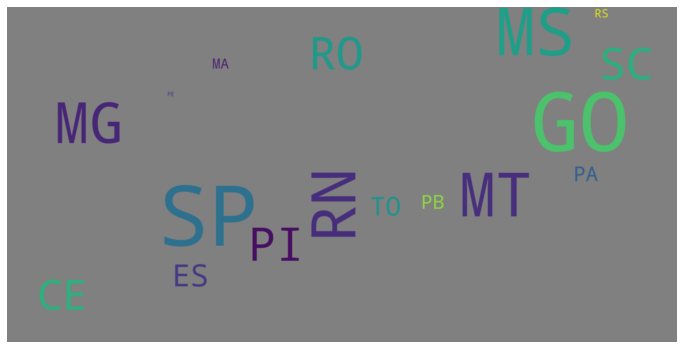

In [156]:
#word cloud com a list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,background_color="gray").fit_words(list_estados)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud para Serviço

In [157]:
df.serviço

0                                 outros contratos
1                                   telefonia fixa
2                                 energia elétrica
3                                   estacionamento
4                                   telefonia fixa
                           ...                    
42302    microcomputador   produtos de informática
42303                                    vestuário
42304                     acessório para vestuário
42305             agências e operadoras de viagens
42306                                       escola
Name: serviço, Length: 42280, dtype: object

In [158]:
#colocar todas as palavras de ['empresas'] em minúsculas     001
letra_minuscula = lambda x: x.replace(x, x.lower())
df['serviço'] = df.serviço.map(letra_minuscula)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [159]:
df.serviço

0                                 outros contratos
1                                   telefonia fixa
2                                 energia elétrica
3                                   estacionamento
4                                   telefonia fixa
                           ...                    
42302    microcomputador   produtos de informática
42303                                    vestuário
42304                     acessório para vestuário
42305             agências e operadoras de viagens
42306                                       escola
Name: serviço, Length: 42280, dtype: object

In [160]:
#Remover pontuação
string.punctuation
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df.serviço = df.serviço.map(punc_re)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [161]:
df.serviço

0                                 outros contratos
1                                   telefonia fixa
2                                 energia elétrica
3                                   estacionamento
4                                   telefonia fixa
                           ...                    
42302    microcomputador   produtos de informática
42303                                    vestuário
42304                     acessório para vestuário
42305             agências e operadoras de viagens
42306                                       escola
Name: serviço, Length: 42280, dtype: object

## Tokenizacao

In [162]:
#Tokenizar ['empresa'] em palavras 1     002

df['tokens_serviço'] = df.serviço.map(word_tokenize)
df[['serviço','tokens_serviço']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,serviço,tokens_serviço
0,outros contratos,"[outros, contratos]"
1,telefonia fixa,"[telefonia, fixa]"
2,energia elétrica,"[energia, elétrica]"
3,estacionamento,[estacionamento]
4,telefonia fixa,"[telefonia, fixa]"
...,...,...
42302,microcomputador produtos de informática,"[microcomputador, produtos, de, informática]"
42303,vestuário,[vestuário]
42304,acessório para vestuário,"[acessório, para, vestuário]"
42305,agências e operadoras de viagens,"[agências, e, operadoras, de, viagens]"


In [163]:
df[['serviço','tokens_serviço']]

,serviço,tokens_serviço
0,outros contratos,"[outros, contratos]"
1,telefonia fixa,"[telefonia, fixa]"
2,energia elétrica,"[energia, elétrica]"
3,estacionamento,[estacionamento]
4,telefonia fixa,"[telefonia, fixa]"
...,...,...
42302,microcomputador produtos de informática,"[microcomputador, produtos, de, informática]"
42303,vestuário,[vestuário]
42304,acessório para vestuário,"[acessório, para, vestuário]"
42305,agências e operadoras de viagens,"[agências, e, operadoras, de, viagens]"


## Análise Serviço sem filtros

In [164]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados 22    555

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df.tokens_serviço.tolist(), [])
########################################################################

word_list_clean[:10]

['outros',
 'contratos',
 'telefonia',
 'fixa',
 'energia',
 'elétrica',
 'estacionamento',
 'telefonia',
 'fixa',
 'agências']

In [165]:
# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
list_servico = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(9100, 'de'),
 (5771, 'telefonia'),
 (5140, 'telefone'),
 (3036, 'celular'),
 (2987, 'cartão'),
 (2954, 'outros'),
 (2780, 'e'),
 (2713, 'fixa'),
 (2546, 'comercial'),
 (2446, 'banco')]

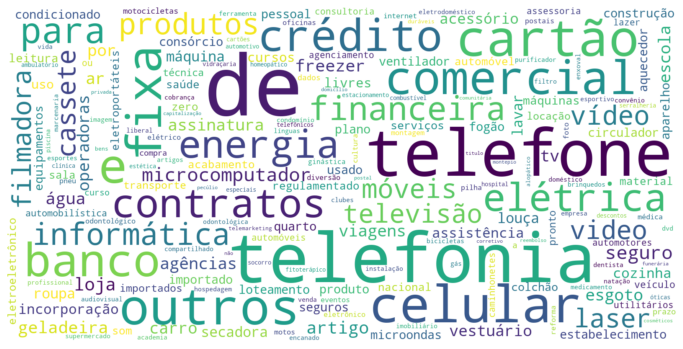

In [166]:
#word cloud com a list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,background_color="white").fit_words(list_servico)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analise Serviço com stop words

In [167]:
# Remover as stop words

from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df['tokens_serviço_stop'] = df.tokens_serviço.apply(stop_lambda)
df[['serviço','tokens_serviço','tokens_serviço_stop']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,serviço,tokens_serviço,tokens_serviço_stop
0,outros contratos,"[outros, contratos]","[outros, contratos]"
1,telefonia fixa,"[telefonia, fixa]","[telefonia, fixa]"
2,energia elétrica,"[energia, elétrica]","[energia, elétrica]"
3,estacionamento,[estacionamento],[estacionamento]
4,telefonia fixa,"[telefonia, fixa]","[telefonia, fixa]"
...,...,...,...
42302,microcomputador produtos de informática,"[microcomputador, produtos, de, informática]","[microcomputador, produtos, informática]"
42303,vestuário,[vestuário],[vestuário]
42304,acessório para vestuário,"[acessório, para, vestuário]","[acessório, vestuário]"
42305,agências e operadoras de viagens,"[agências, e, operadoras, de, viagens]","[agências, operadoras, viagens]"


In [168]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_servico = sum(df.tokens_serviço_stop.tolist(), [])

word_list_servico[:10]

['outros',
 'contratos',
 'telefonia',
 'fixa',
 'energia',
 'elétrica',
 'estacionamento',
 'telefonia',
 'fixa',
 'agências']

In [169]:
# Converte a lista em um dicionário com contagem de valores
word_counts_serviço = Counter(word_list_servico)
list_servico_stop = word_counts_serviço

# Inverta a chave / valores no dicionário para classificar
word_counts_serviço = list(zip(word_counts_serviço.values(), word_counts_serviço.keys()))

# Classifique a lista por contagem
word_counts_serviço = sorted(word_counts_serviço, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_serviço[:10]

[(5771, 'telefonia'),
 (5140, 'telefone'),
 (3036, 'celular'),
 (2987, 'cartão'),
 (2954, 'outros'),
 (2713, 'fixa'),
 (2546, 'comercial'),
 (2446, 'banco'),
 (2274, 'crédito'),
 (1859, 'contratos')]

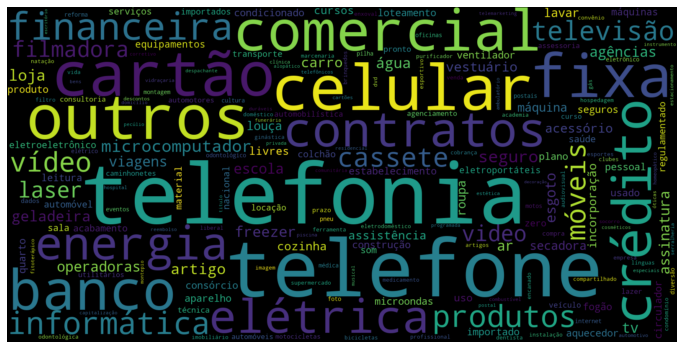

In [170]:
#word cloud com a list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,background_color="black").fit_words(list_servico_stop)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()